In [1]:
%pip install sentence-transformers

     ---------------------------------------- 0.0/86.0 kB ? eta -:--:--
     ---------------------------------------- 86.0/86.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     -- ------------------------------------- 0.5/7.2 MB 9.4 MB/s eta 0:00:01
     ---- ----------------------------------- 0.8/7.2 MB 8.9 MB/s eta 0:00:01
     ------- -------------------------------- 1.3/7.2 MB 8.9 MB/s eta 0:00:01
     --------- ------------------------------ 1.7/7.2 MB 8.8 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.2 MB 8.9 MB/s eta 0:00:01
     ------------- -------------------------- 2.5/7.2 MB 8.8 MB/s eta 0:00:01
     ---------------- ----------------------- 3.0/7.2 MB 9.0 MB/s eta 0:00:01
     ------------------ --------------------- 3.4/7.2 MB 9.0 MB/s eta 0:00:01
     -------------------- ------------------- 3.8/7


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('all-MiniLM-L6-v2')

In [35]:
from sentence_transformers import util

embedding1 = model.encode("Headset")
embedding2 = model.encode("Headphones")

cos_sim = util.cos_sim(embedding1, embedding2)
print(cos_sim)

embedding1 = model.encode("What has happened to my delivery")
embedding2 = model.encode("What is the weather like tomorrow?")

cos_sim = util.cos_sim(embedding1, embedding2)
print(cos_sim)

tensor([[0.4146]])
tensor([[0.0021]])


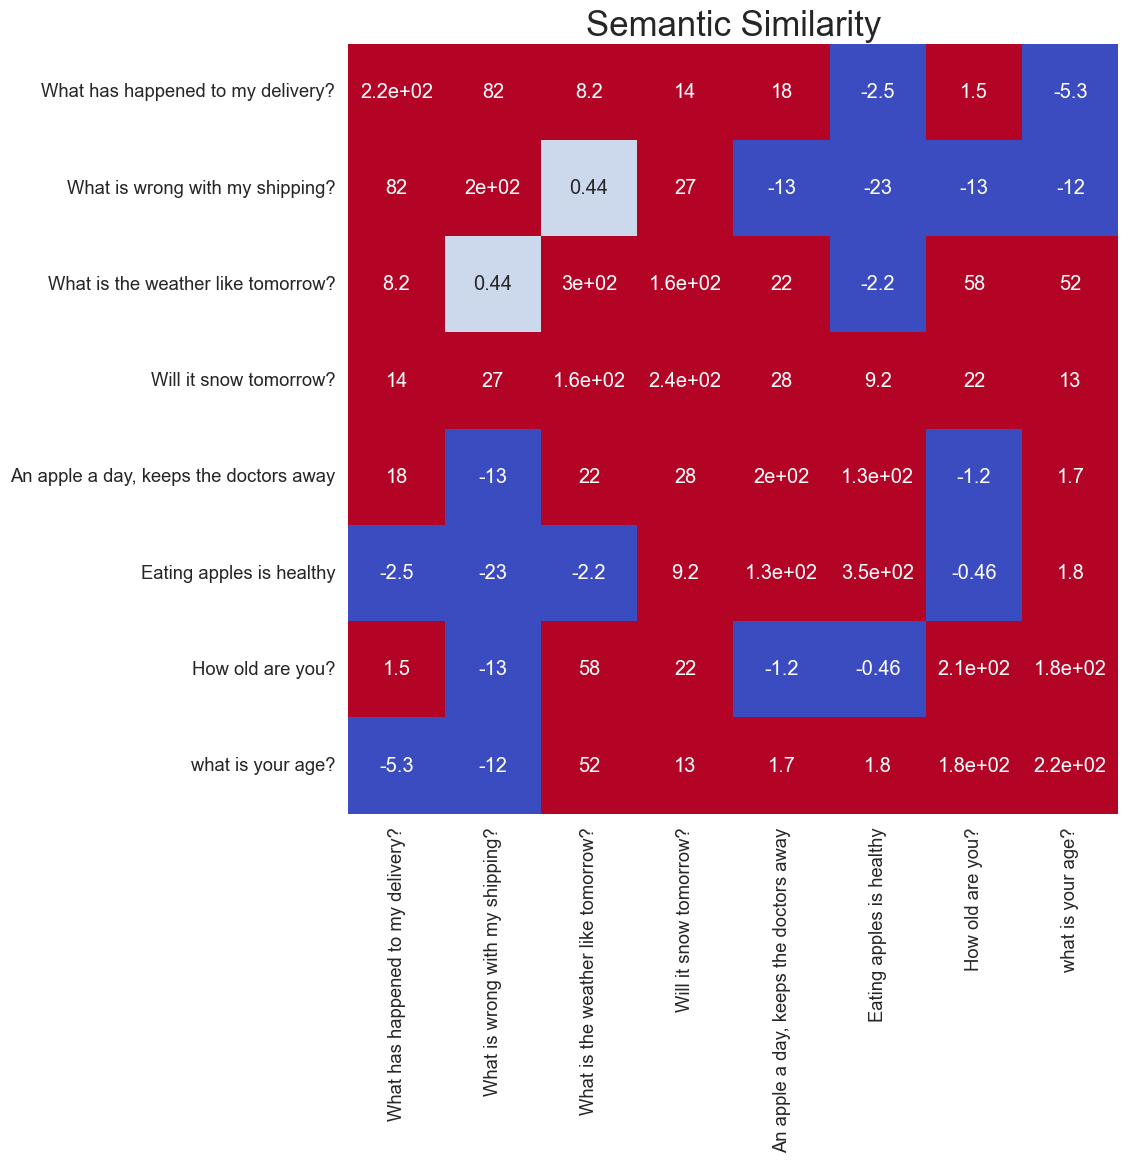

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10, 10))
    g = sns.heatmap(
        corr,
        xticklabels=labels,
        yticklabels=labels,
        vmin=0,
        vmax=1,
        cmap="coolwarm",
        robust=True,
        cbar=False,
        square=True,
        annot=True,
    )
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Similarity", fontsize=25)


def run_and_plot(messages_):
    message_embeddings_ = model.encode(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

messages = [
    # Shipping
    "What has happened to my delivery?",
    "What is wrong with my shipping?",
    # Weather
    "What is the weather like tomorrow?",
    "Will it snow tomorrow?",
    # Health
    "An apple a day, keeps the doctors away",
    "Eating apples is healthy",
    # Age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

In [24]:
import psutil
process = psutil.Process()
print(process.memory_info().rss)

478515200
